<a href="https://www.kaggle.com/code/sindhurank/eda-on-aerofit-treadmill-buyer-profile?scriptVersionId=157523425" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# EDA on AeroFit Treadmill Buyer
### This project is developed by Gaurang Kumbhar.¶
### Contact: gaurang.kumbhar1332003@gmail.com

## About this Dataset
The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset features their Age, Gender, Education, Marital-Status, Income and other attributes.

### Product Portfolio:

    1. The KP281 is an entry-level treadmill that sells for $1,500.
    2. The KP481 is for mid-level runners that sell for $1,750.
    3. The KP781 treadmill is having advanced features that sell for $2,500.

In [8]:
from warnings import filterwarnings
filterwarnings('ignore')

In [9]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
td=pd.read_csv(r"E:\EDA PROJECT\DATASETS FOR EDA\aerofit_treadmill.csv")
td.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [11]:
td.shape

(180, 9)

In [12]:
td.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [13]:
td.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


### Overall Customer Profile: 
    1. Customers age between 18 and 50
    2. Education between 12 years - 21 years
    3. Usage between 2-7 times a week
    4. Fitness rating of customers lie between 1-5
    5. Customers income range from 29k - 104k
    6. Miles covered range from 21-360 each week
    7. Majorty Male customers
    8. KP281 is highly sold product
    9. Majorty customers are Partnered

In [14]:
td.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

## Missing values


In [15]:
td.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [16]:
td.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [17]:
td.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [18]:
td.duplicated().sum()

0

# Descriptive Analysis

In [19]:
td.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [20]:
cat=list(td.columns[td.dtypes=='object'])
cat

['Product', 'Gender', 'MaritalStatus']

In [21]:
con=list(td.columns[td.dtypes!='object'])
con

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

In [22]:
td[cat].describe().T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [23]:
td[con].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


## Separate data based on company's product 
### - Product p1 → KP281
### - Product p2 → KP481
### - Product p3 → KP881


In [24]:
p1=td.query("Product=='KP281'")
p1.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


In [25]:
p2=td.query("Product=='KP481'")
p2.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,KP481,19,Male,14,Single,3,3,31836,64
81,KP481,20,Male,14,Single,2,3,32973,53


In [26]:
p3=td.query("Product=='KP781'")
p3.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,KP781,22,Male,14,Single,4,3,48658,106
141,KP781,22,Male,16,Single,3,5,54781,120


# Data Visualisation


# ---------------------------------------------------
# 📌 Univariate Analysis
# ---------------------------------------------------
## Univariate analysis involves examining each variable individually.
## It helps to understand the distribution, central tendency, and range
## of a single variable.
## This step is crucial to identify patterns, outliers, or anomalies
## in individual features before moving to multivariate analysis.


Text(0.5, 1.0, 'Countplot of MaritalStatus')

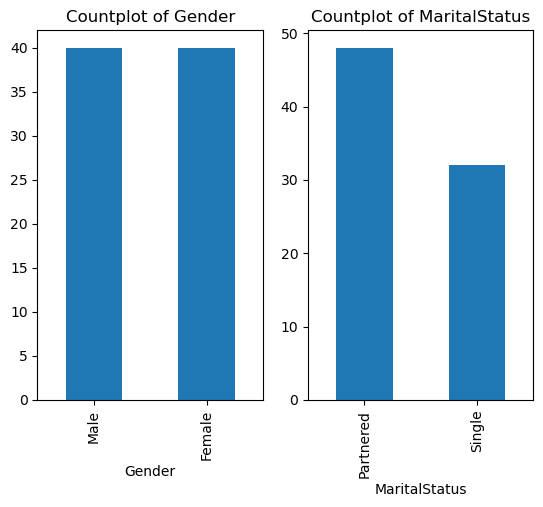

In [27]:
fig,ax=plt.subplots(nrows=1,ncols=2)
p1['Gender'].value_counts().plot(kind='bar',ax=ax[0])
ax[0].set_title('Countplot of Gender')
p1['MaritalStatus'].value_counts().plot(kind='bar',ax=ax[1])
ax[1].set_title('Countplot of MaritalStatus')

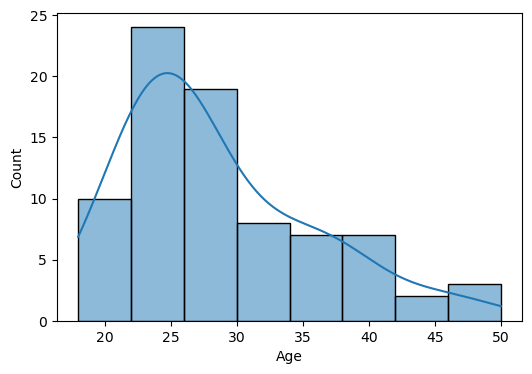

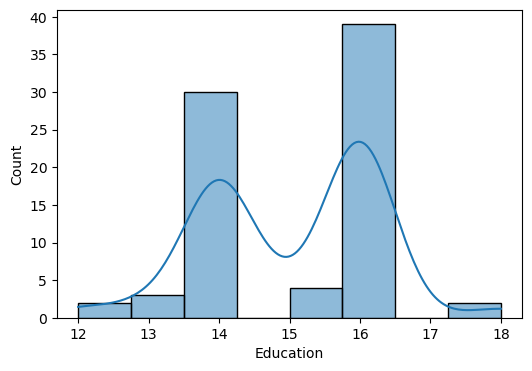

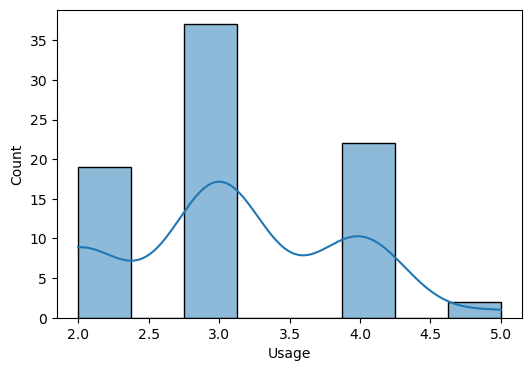

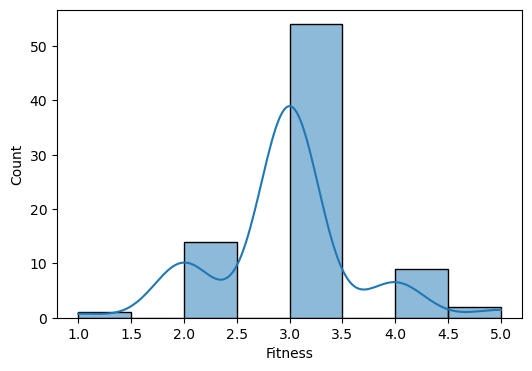

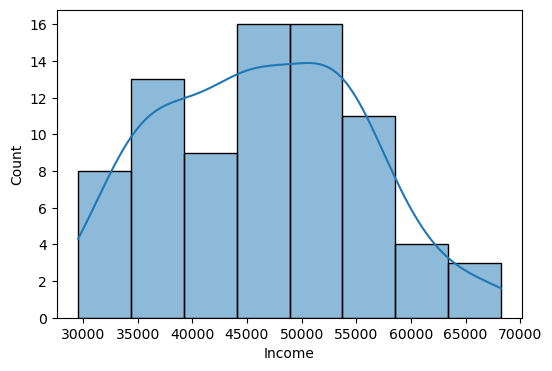

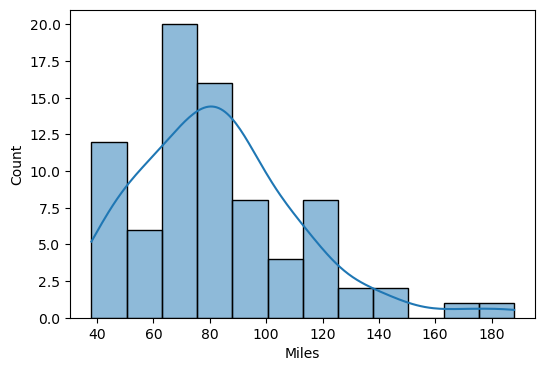

In [28]:
for i in con:
    plt.figure(figsize=(6,4))
    sns.histplot(data=p1,x=i,kde=True)
    plt.show()

# 📊 Graphical Analysis Summary for Product KP281:

### 1. Customers in the *Partnered* segment show higher purchase rates.
### 2. The majority of sales come from the *22–30 years* age group.
### 3. Most customers have an education level of *14 to 16 years*.
### 4. Product usage peaks at around *3 times per week*.
### 5. The highest fitness rating falls between *3.0 and 3.5*.
### 6. Most customers have an income range of *$34,000 to $53,000*.
### 7. The majority of customers cover *60 to 85 miles* weekly.


## 📊 Bivariate Analysis

Bivariate analysis is performed to explore the **relationship between two variables**. It helps identify patterns, trends, or associations between features, especially in the context of target prediction or feature interaction.

### 🔹 Common Methods:

- **Scatter Plot** & **Correlation Heatmap**  
  → For **continuous vs. continuous** variables  
  → Helps detect linear or nonlinear relationships

- **Box Plot**  
  → For **categorical vs. continuous** variables  
  → Useful for comparing distributions across categories

- **Crosstab / Contingency Table**  
  → For **categorical vs. categorical** variables  
  → Summarizes frequency distributions and relationships


<Axes: >

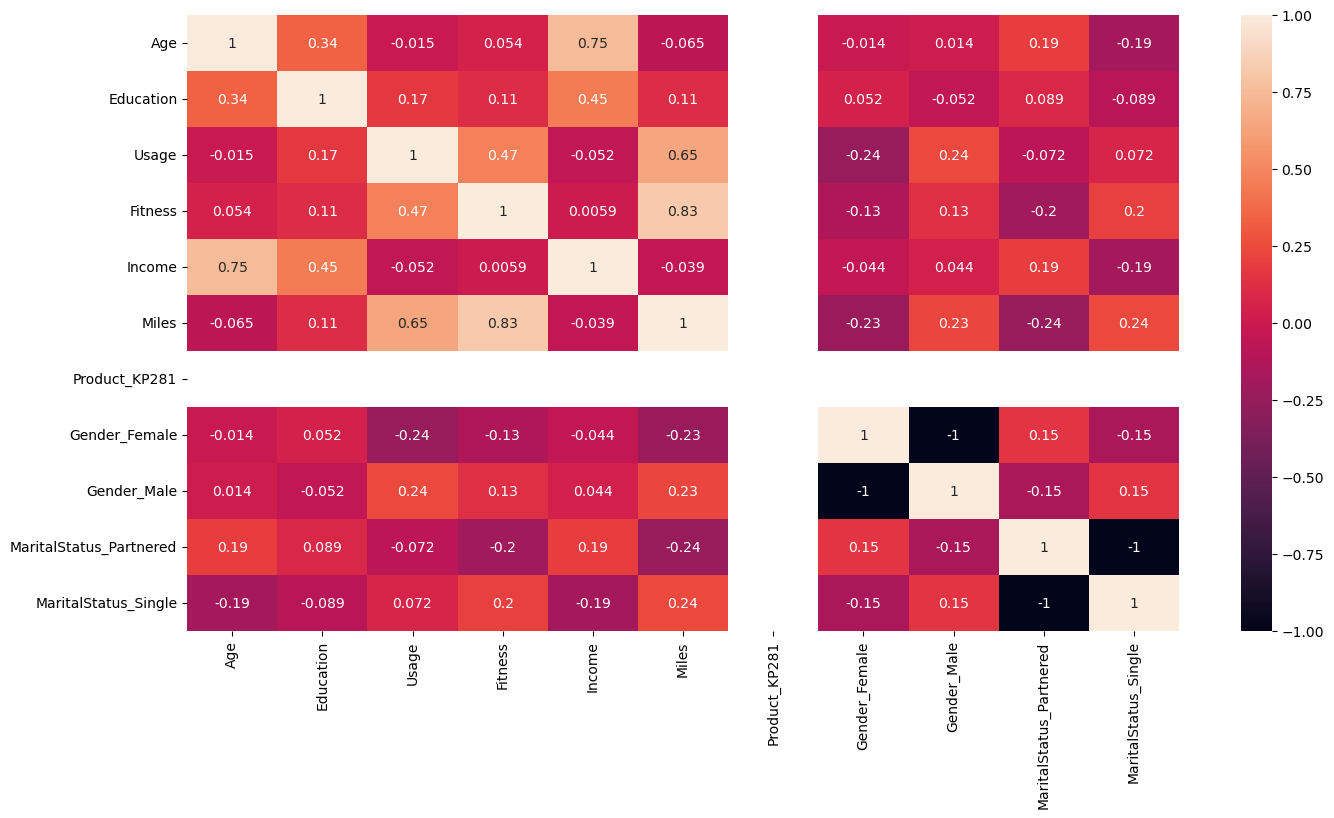

In [29]:

p1gd=pd.get_dummies(p1)
plt.figure(figsize=(16,8))
sns.heatmap(p1gd.corr(),annot=True)

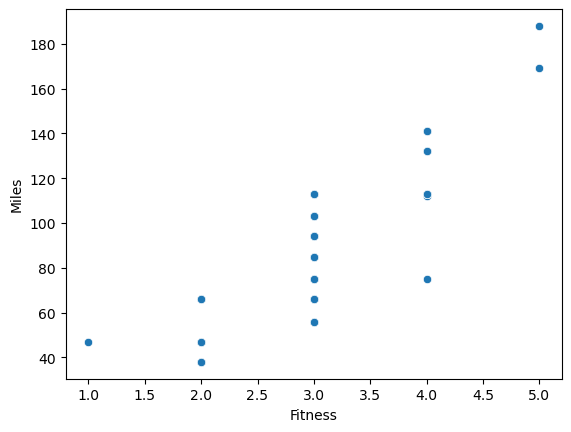

In [30]:
sns.scatterplot(p1,x='Fitness',y='Miles')
plt.show()

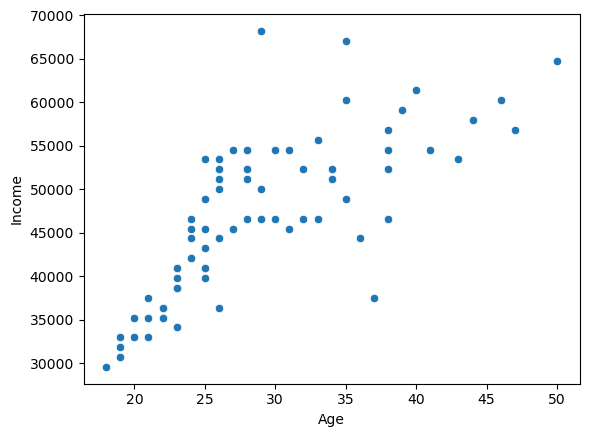

In [31]:
sns.scatterplot(p1,x='Age',y='Income')
plt.show()

Text(0.5, 1.0, 'KP281 product vs Age')

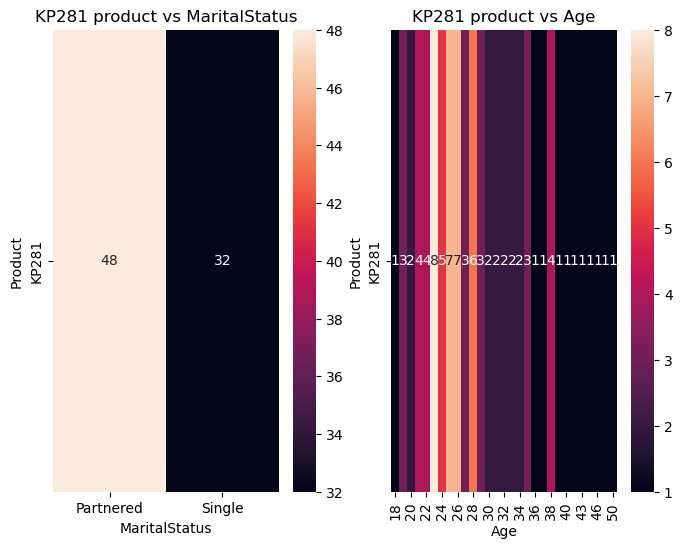

In [32]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,6))

ctab1=pd.crosstab(p1['Product'],p1['MaritalStatus'])
sns.heatmap(ctab1,annot=True,ax=ax[0])
ax[0].set_title('KP281 product vs MaritalStatus')

ctab2=pd.crosstab(p1['Product'],p1['Age'])
sns.heatmap(ctab2,annot=True,ax=ax[1])
ax[1].set_title('KP281 product vs Age')

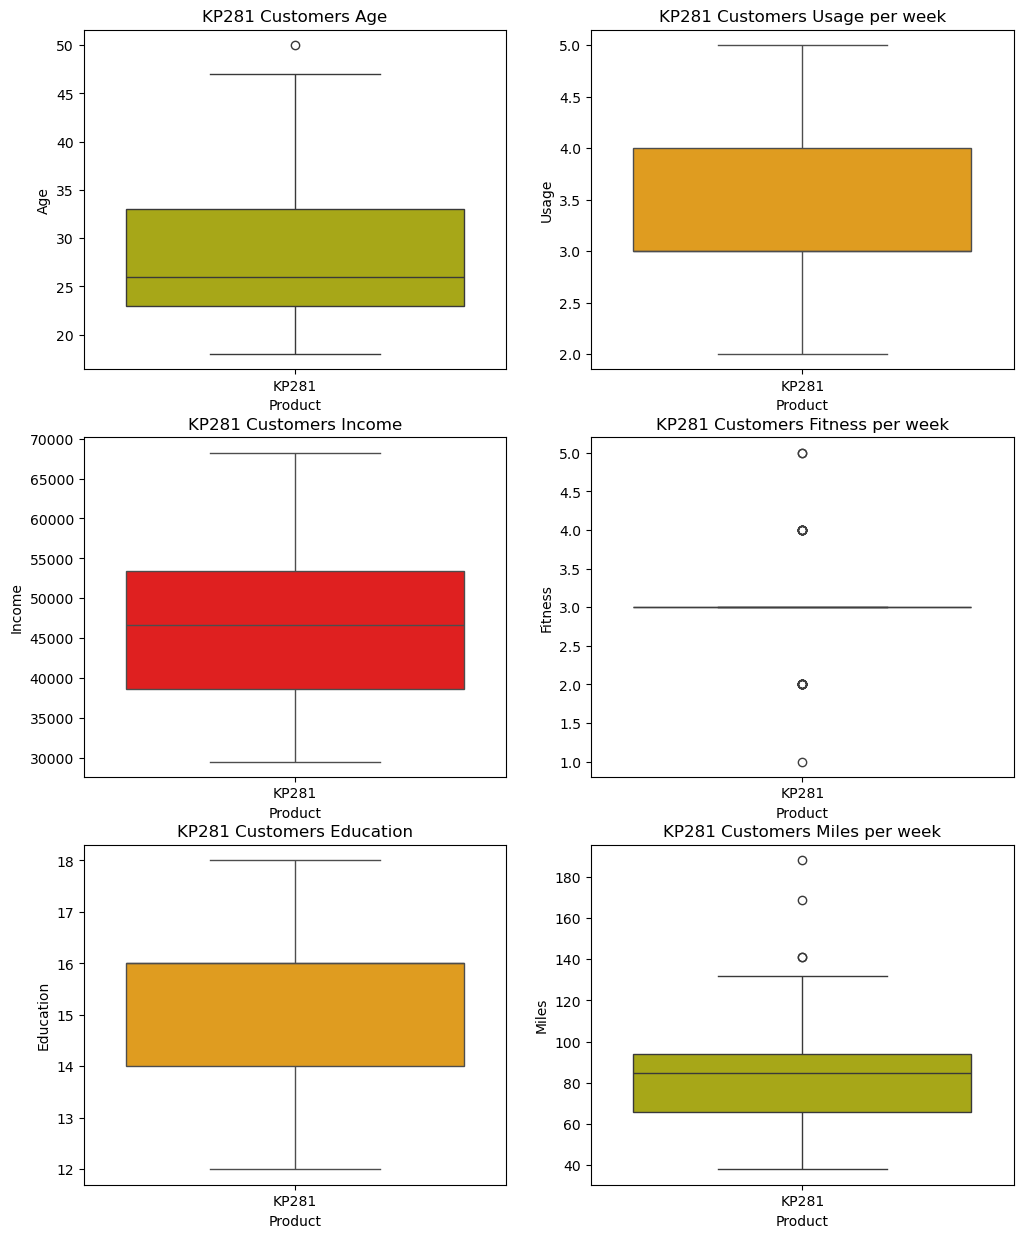

In [33]:
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(12,15))


sns.boxplot(p1,x='Product',y='Age',ax=ax[0,0],color='y')
ax[0,0].set_title("KP281 Customers Age")

sns.boxplot(p1,x='Product',y='Usage',ax=ax[0,1],color='orange')
ax[0,1].set_title("KP281 Customers Usage per week")

sns.boxplot(p1,x='Product',y='Income',ax=ax[1,0],color='r')
ax[1,0].set_title("KP281 Customers Income")

sns.boxplot(p1,x='Product',y='Fitness',ax=ax[1,1])
ax[1,1].set_title("KP281 Customers Fitness per week")

sns.boxplot(p1,x='Product',y='Education',ax=ax[2,0],color='orange')
ax[2,0].set_title("KP281 Customers Education")

sns.boxplot(p1,x='Product',y='Miles',ax=ax[2,1],color='y')
ax[2,1].set_title("KP281 Customers Miles per week")
plt.show()

# Product KP481

## Univariate anlaysis

Text(0.5, 1.0, 'Countplot of MaritalStatus')

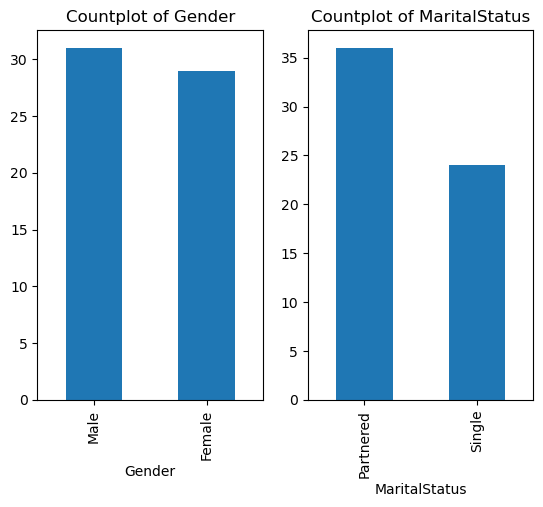

In [34]:
fig,ax=plt.subplots(nrows=1,ncols=2)
p2['Gender'].value_counts().plot(kind='bar',ax=ax[0])
ax[0].set_title('Countplot of Gender')
p2['MaritalStatus'].value_counts().plot(kind='bar',ax=ax[1])
ax[1].set_title('Countplot of MaritalStatus')

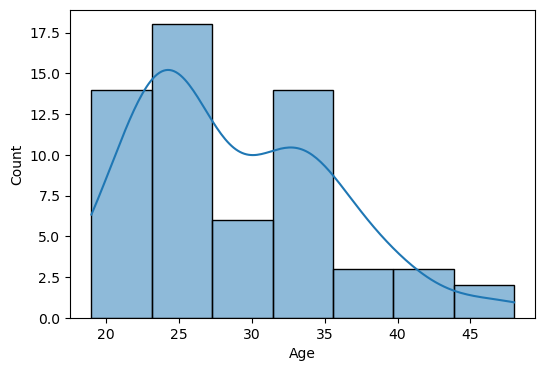

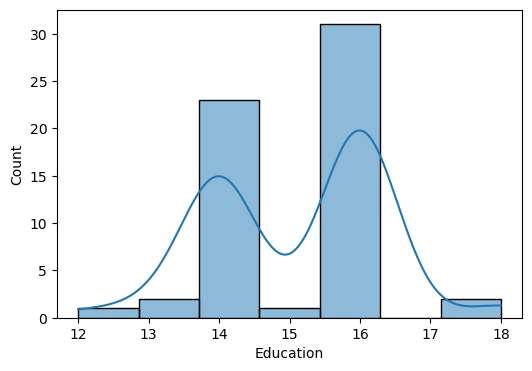

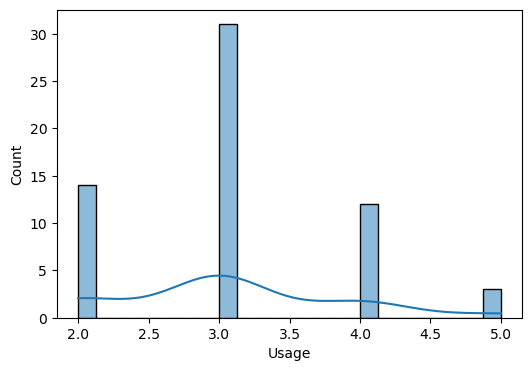

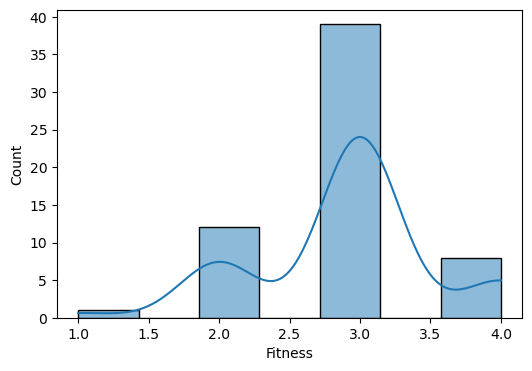

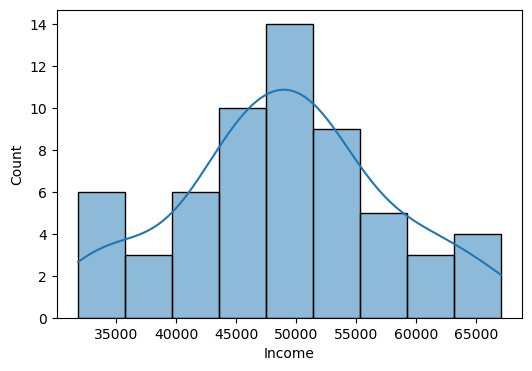

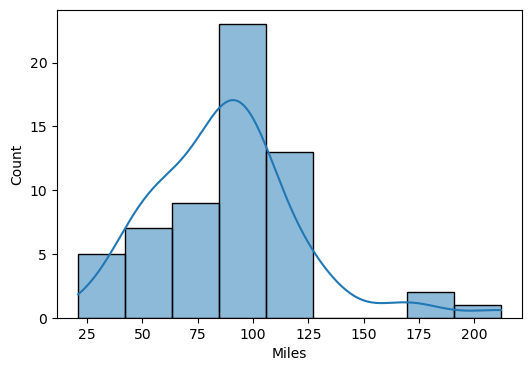

In [36]:
for i in con:
    plt.figure(figsize=(6,4))
    sns.histplot(data=p2,x=i,kde=True)
    plt.show()

### 🔍 Analysis Summary

The following customer characteristics appear to be most common or influential based on the data:

- **Age Group:** 19–27 years and 32–35 years  
- **Education Level:** 14 and 16 years of education  
- **Product Usage:** Usage frequency of 3  
- **Fitness Rating:** Score of 3 out of 5  
- **Annual Income:** Between \$44,000 and \$55,000  
- **Miles Target:** Between 85 and 105 miles

These traits may indicate a key customer segment or target audience for further business or marketing strategies.


## 📊 Bivariate Analysis

Bivariate analysis helps explore the relationship between **two variables**. Depending on the types of variables involved (categorical or continuous), different visualization techniques are used:

- **Scatter Plot & Heatmap**  
  → For **continuous vs. continuous** variables  
  → Used to observe correlations or trends between numeric features

- **Box Plot**  
  → For **categorical vs. continuous** variables  
  → Helps compare the distribution of a continuous variable across categories

- **Crosstab (Contingency Table)**  
  → For **categorical vs. categorical** variables  
  → Displays frequency counts and relationships between categories


<Axes: >

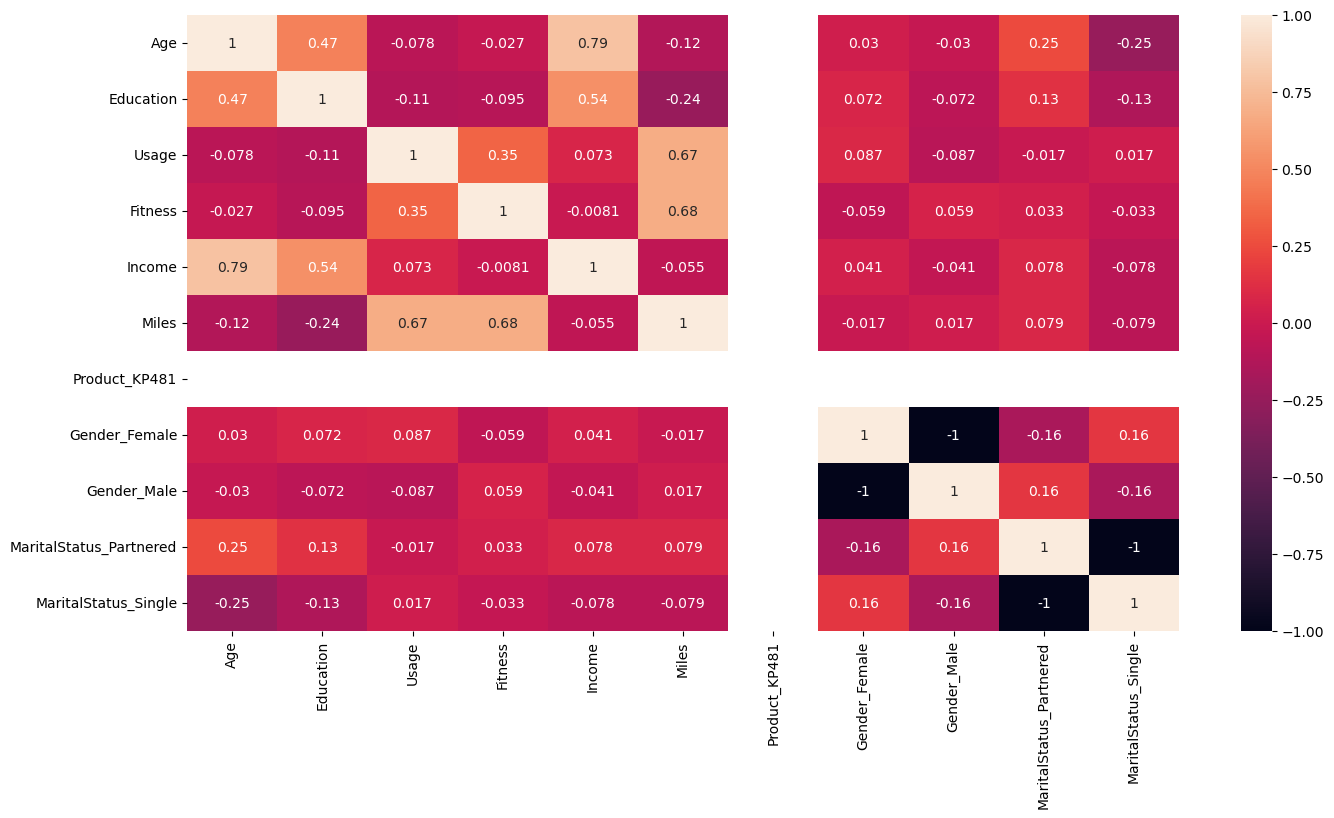

In [37]:

p2gd=pd.get_dummies(p2)
plt.figure(figsize=(16,8))
sns.heatmap(p2gd.corr(),annot=True)

<Axes: xlabel='Age', ylabel='Income'>

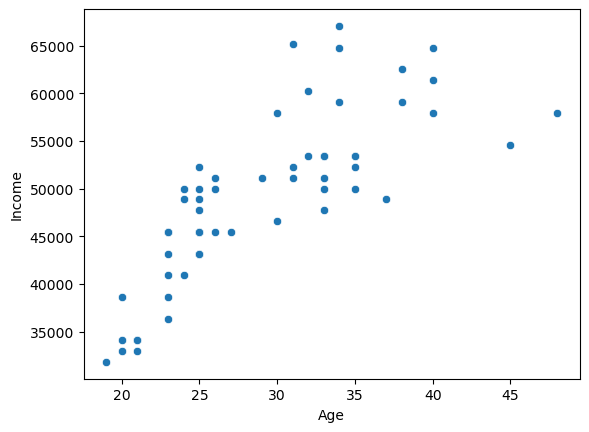

In [38]:
sns.scatterplot(p2,x='Age',y='Income')

Text(0.5, 1.0, 'KP481 product vs Age')

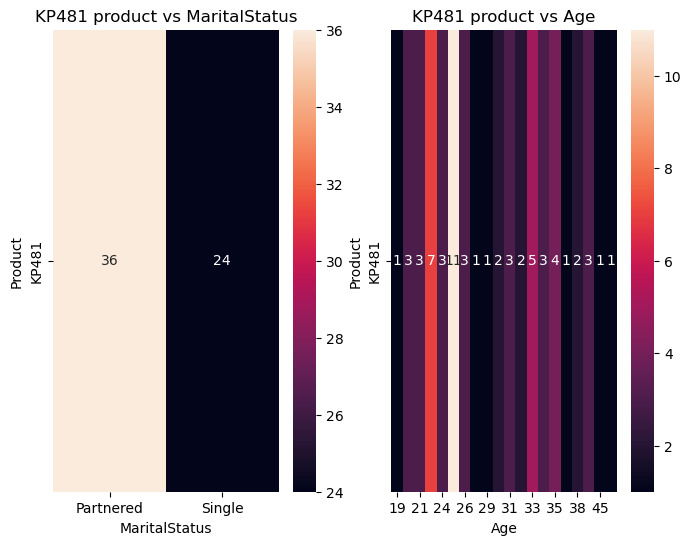

In [39]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,6))

ctab1=pd.crosstab(p2['Product'],p2['MaritalStatus'])
sns.heatmap(ctab1,annot=True,ax=ax[0])
ax[0].set_title('KP481 product vs MaritalStatus')

ctab2=pd.crosstab(p2['Product'],p2['Age'])
sns.heatmap(ctab2,annot=True,ax=ax[1])
ax[1].set_title('KP481 product vs Age')

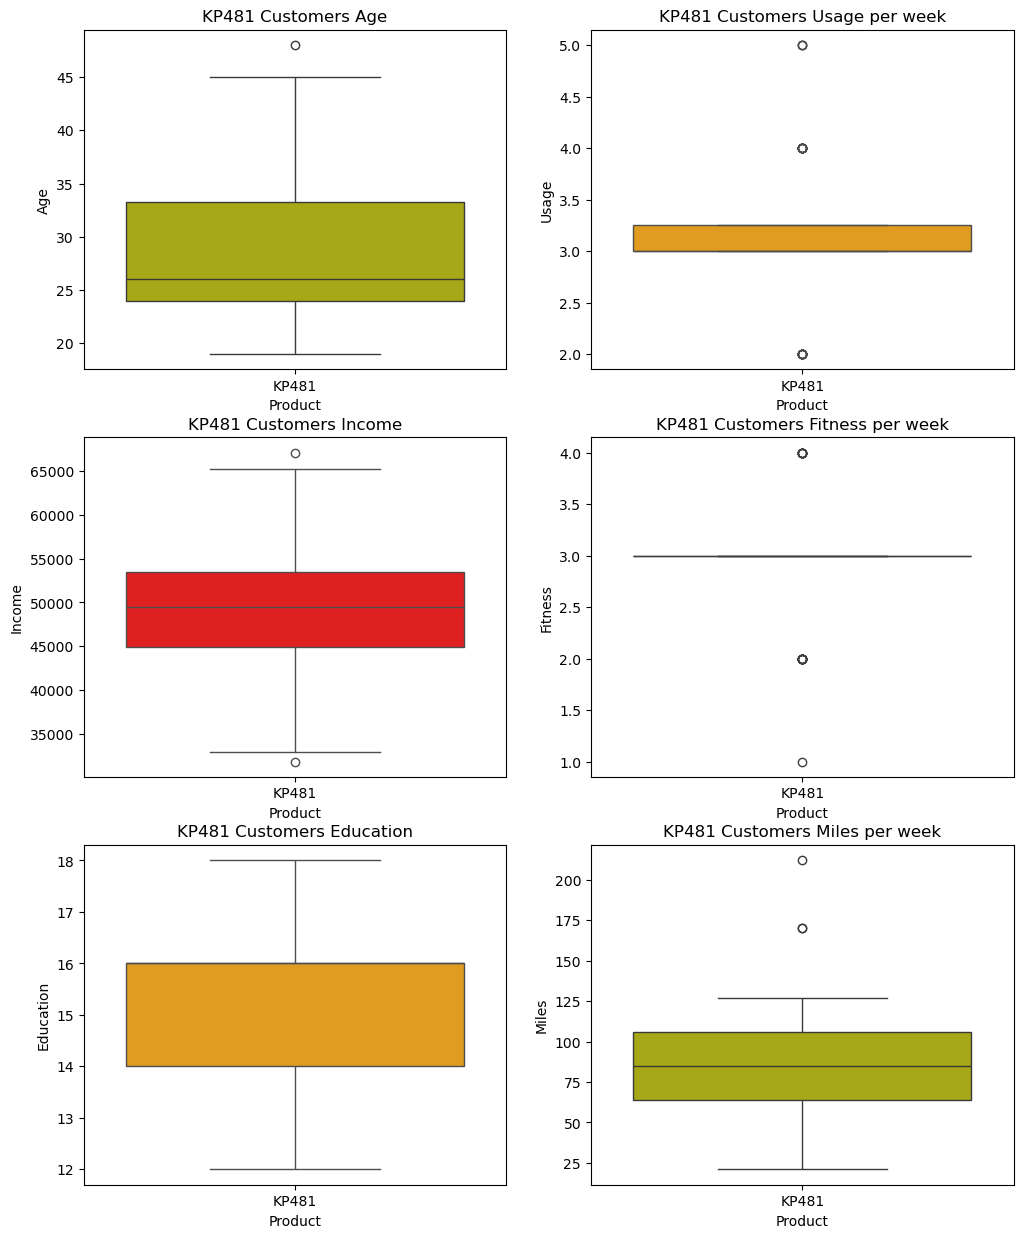

In [41]:
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(12,15))


sns.boxplot(p2,x='Product',y='Age',ax=ax[0,0],color='y')
ax[0,0].set_title("KP481 Customers Age")

sns.boxplot(p2,x='Product',y='Usage',ax=ax[0,1],color='orange')
ax[0,1].set_title("KP481 Customers Usage per week")

sns.boxplot(p2,x='Product',y='Income',ax=ax[1,0],color='r')
ax[1,0].set_title("KP481 Customers Income")

sns.boxplot(p2,x='Product',y='Fitness',ax=ax[1,1])
ax[1,1].set_title("KP481 Customers Fitness per week")

sns.boxplot(p2,x='Product',y='Education',ax=ax[2,0],color='orange')
ax[2,0].set_title("KP481 Customers Education")

sns.boxplot(p2,x='Product',y='Miles',ax=ax[2,1],color='y')
ax[2,1].set_title("KP481 Customers Miles per week")
plt.show()

# Product KP781

## Univariate Analysis

Text(0.5, 1.0, 'Countplot of MaritalStatus')

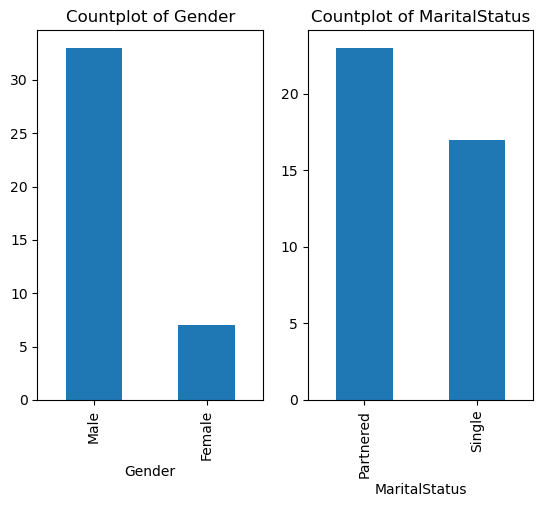

In [42]:
fig,ax=plt.subplots(nrows=1,ncols=2)
p3['Gender'].value_counts().plot(kind='bar',ax=ax[0])
ax[0].set_title('Countplot of Gender')
p3['MaritalStatus'].value_counts().plot(kind='bar',ax=ax[1])
ax[1].set_title('Countplot of MaritalStatus')

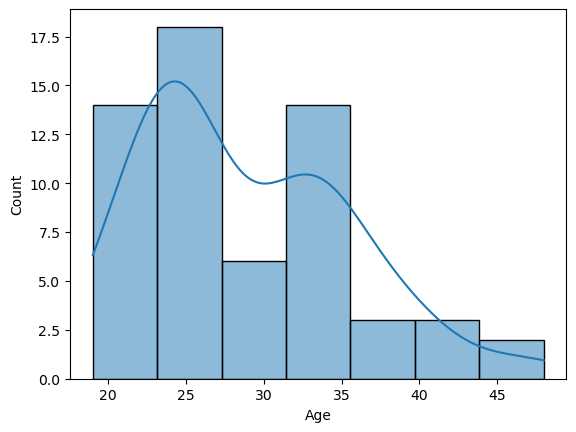

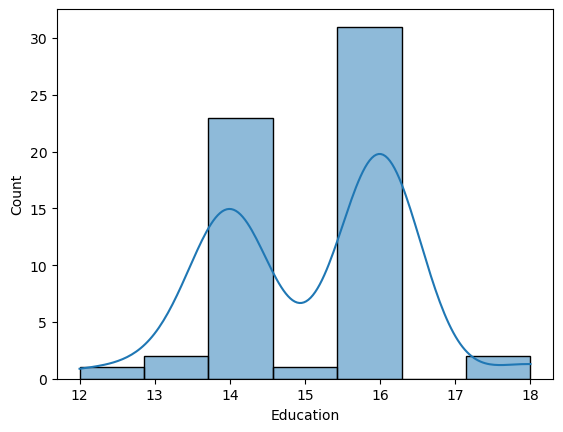

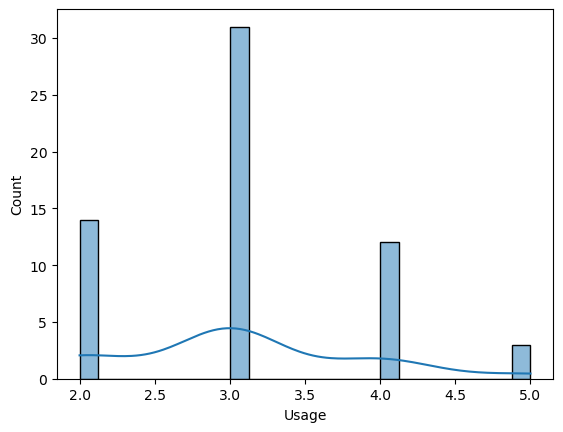

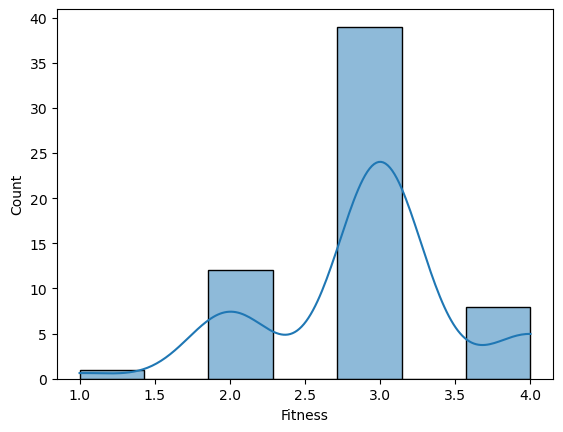

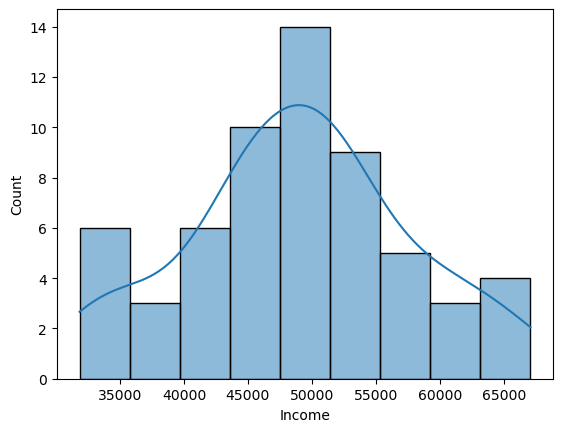

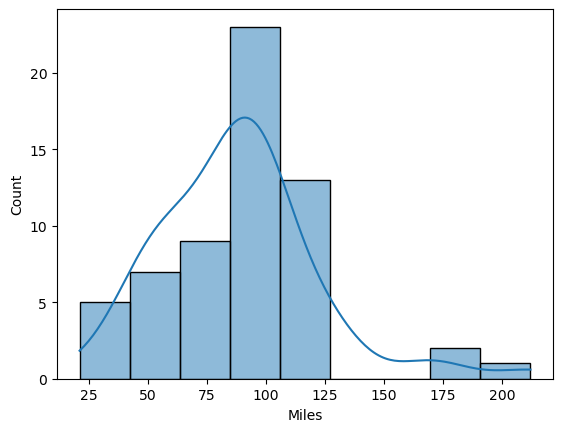

In [43]:
for i in con:
    sns.histplot(data=p2,x=i,kde=True)
    plt.show()

## 🔍 Analysis Summary

Key insights from the customer data:

- **Marital Status:** Majority of customers are **partnered** rather than single.
- **Gender:** Most customers are **male**.
- **Age Group:** Predominantly in the range of **22–31 years**.
- **Education:** Most customers have **16–17 or 18–19 years** of education.
- **Product Usage:** Typically used **4 to 5 times per week**.
- **Fitness Rating:** High fitness levels, with scores between **4.75 and 5**.
- **Annual Income:** Common income levels are around **\$50,000** or **\$95,000**.
- **Miles (Targeted):** Customers typically aim to cover between **200 and 1,160 miles**.

These characteristics may help define a high-engagement customer profile for targeted strategies.


## 📊 Bivariate Analysis

Bivariate analysis explores the relationship between two variables. The type of plot depends on whether the variables are **continuous (con)** or **categorical (cat)**:

- **Scatter Plot** & **Correlation Heatmap**  
  → For **continuous vs. continuous**  
  → Used to examine trends, linearity, and correlation strength

- **Box Plot**  
  → For **categorical vs. continuous**  
  → Shows distribution of continuous values across different categories

- **Crosstab / Contingency Table**  
  → For **categorical vs. categorical**  
  → Displays frequency distribution and relationships between categories


<Axes: >

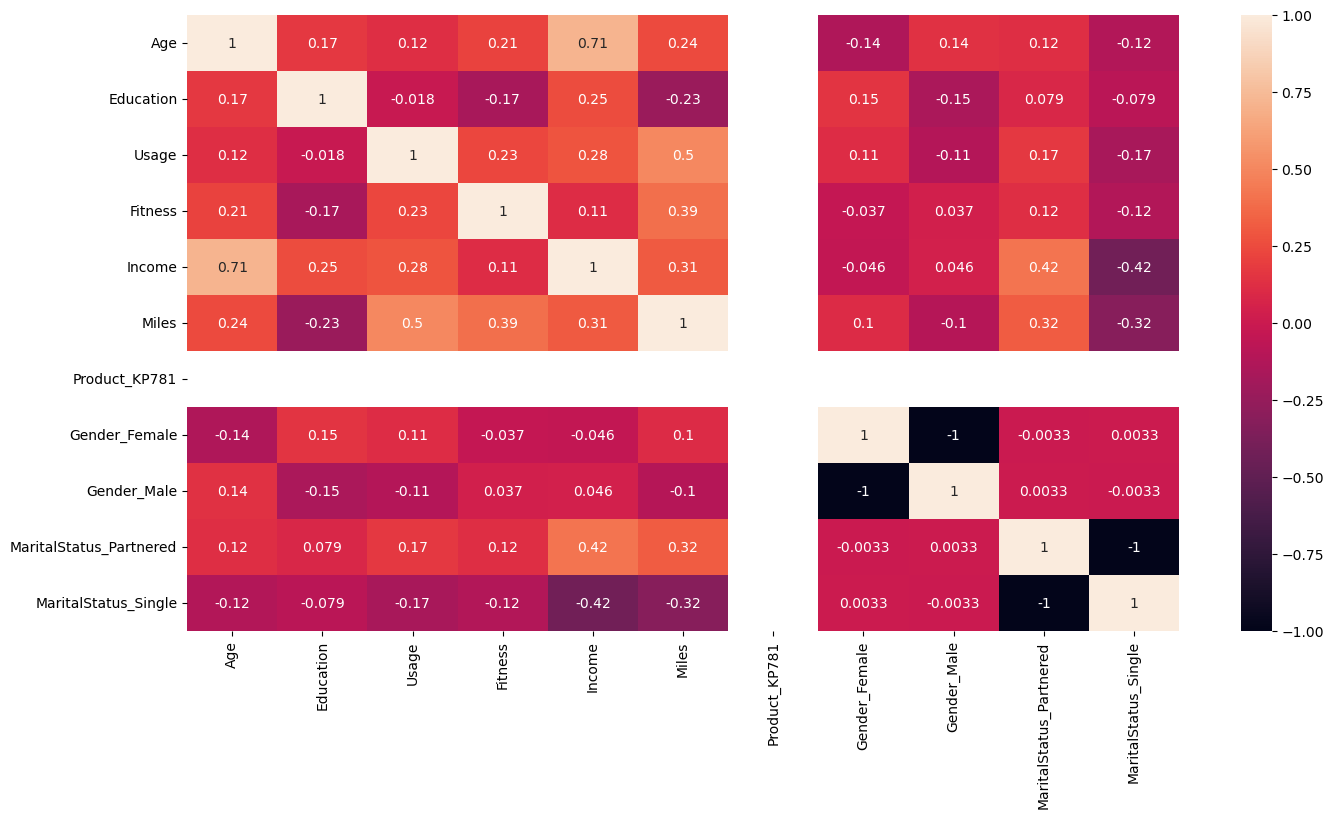

In [50]:

p3gd=pd.get_dummies(p3)
plt.figure(figsize=(16,8))
sns.heatmap(p3gd.corr(),annot=True)

<Axes: xlabel='Income', ylabel='Age'>

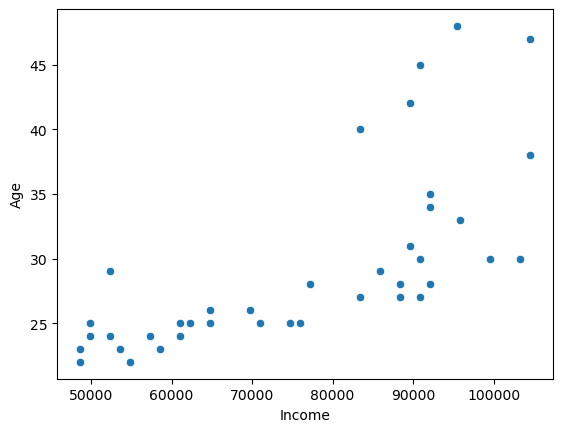

In [45]:
sns.scatterplot(p3,x='Income',y='Age')

Text(0.5, 1.0, 'KP781 product vs Age')

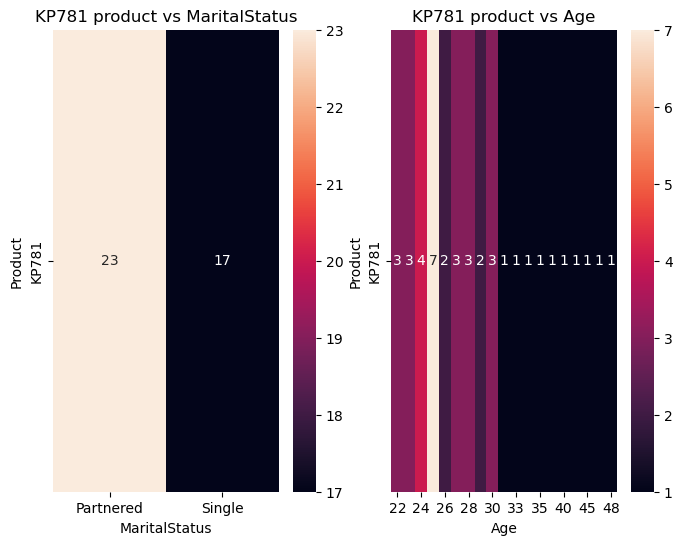

In [47]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,6))

ctab1=pd.crosstab(p3['Product'],p3['MaritalStatus'])
sns.heatmap(ctab1,annot=True,ax=ax[0])
ax[0].set_title('KP781 product vs MaritalStatus')

ctab2=pd.crosstab(p3['Product'],p3['Age'])
sns.heatmap(ctab2,annot=True,ax=ax[1])
ax[1].set_title('KP781 product vs Age')

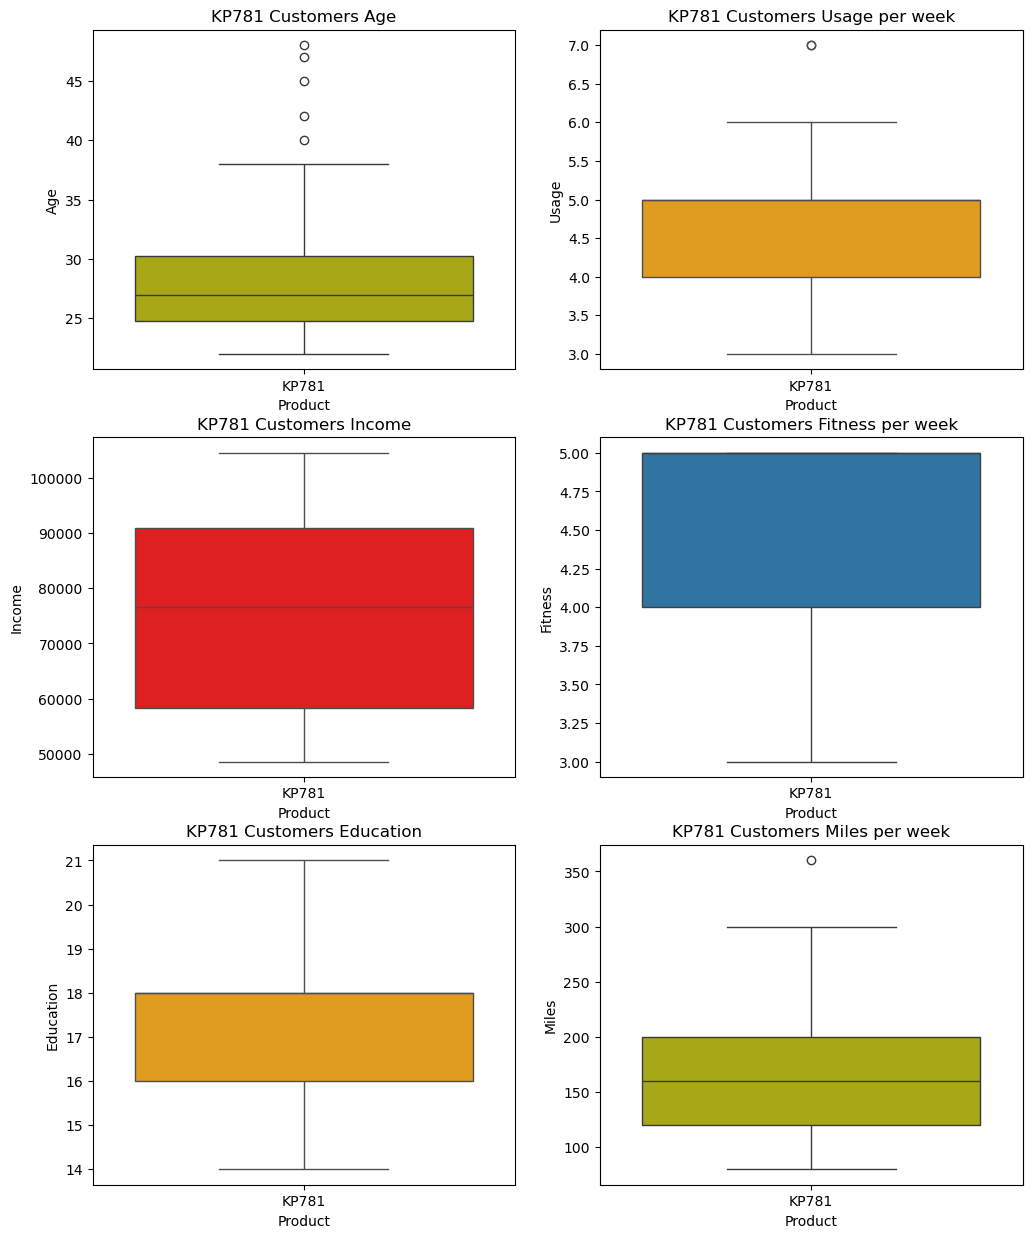

In [48]:
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(12,15))


sns.boxplot(p3,x='Product',y='Age',ax=ax[0,0],color='y')
ax[0,0].set_title("KP781 Customers Age")

sns.boxplot(p3,x='Product',y='Usage',ax=ax[0,1],color='orange')
ax[0,1].set_title("KP781 Customers Usage per week")

sns.boxplot(p3,x='Product',y='Income',ax=ax[1,0],color='r')
ax[1,0].set_title("KP781 Customers Income")

sns.boxplot(p3,x='Product',y='Fitness',ax=ax[1,1])
ax[1,1].set_title("KP781 Customers Fitness per week")

sns.boxplot(p3,x='Product',y='Education',ax=ax[2,0],color='orange')
ax[2,0].set_title("KP781 Customers Education")

sns.boxplot(p3,x='Product',y='Miles',ax=ax[2,1],color='y')
ax[2,1].set_title("KP781 Customers Miles per week")
plt.show()

# ===========================================================

Text(0.5, 1.0, 'Customers Education for different Product')

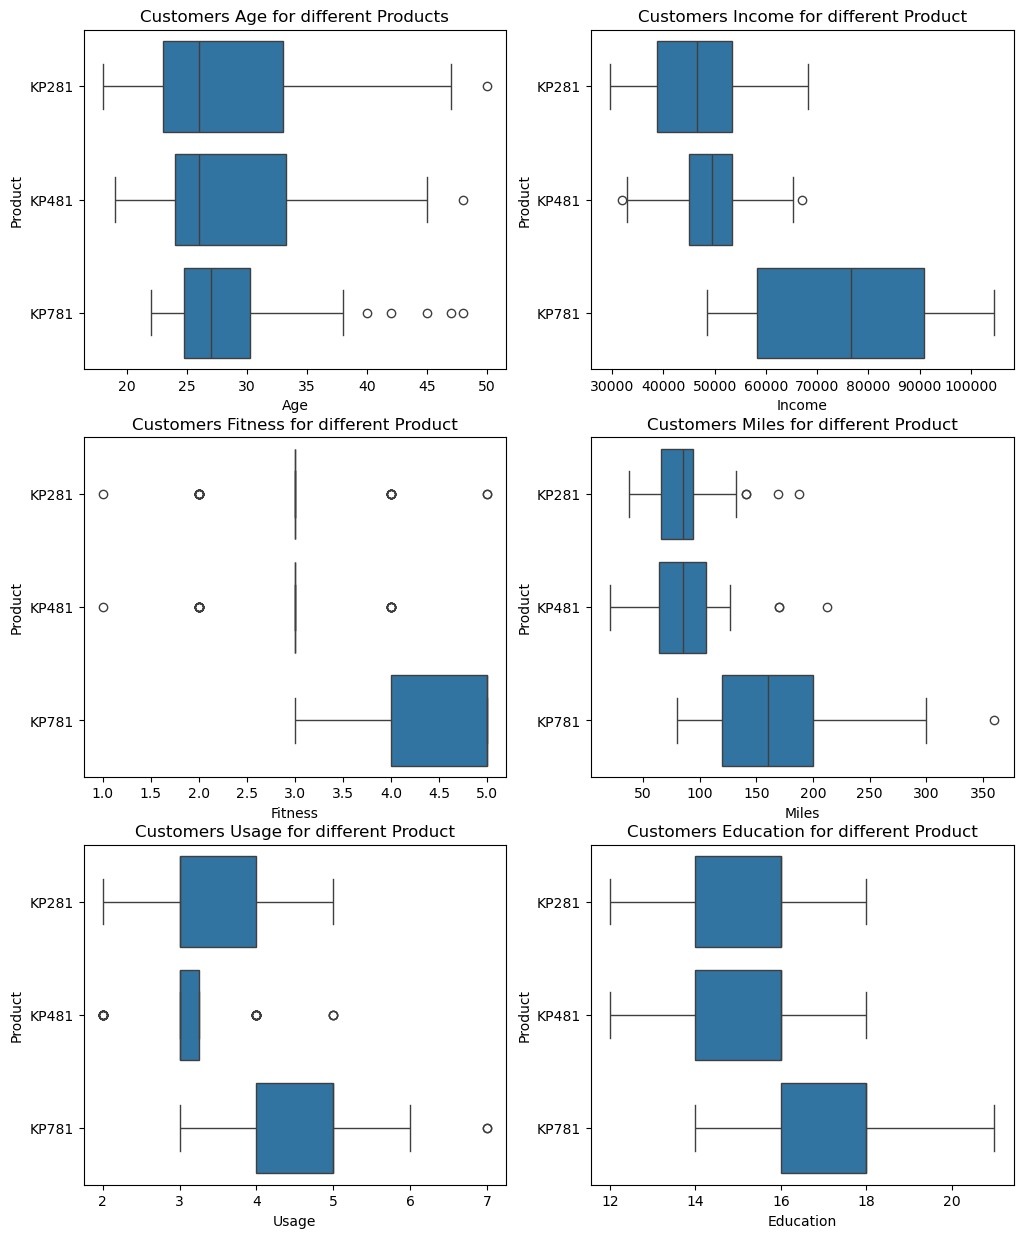

In [49]:
## Product vs Age
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(12,15))
sns.boxplot(data=td, x='Age', y='Product', ax=ax[0,0]); ax[0,0].set_title('Customers Age for different Products')
sns.boxplot(data=td, x='Income', y='Product', ax=ax[0,1]); ax[0,1].set_title('Customers Income for different Product')
sns.boxplot(data=td, x='Fitness', y='Product', ax=ax[1,0]); ax[1,0].set_title('Customers Fitness for different Product')
sns.boxplot(data=td, x='Miles', y='Product', ax=ax[1,1]); ax[1,1].set_title('Customers Miles for different Product')
sns.boxplot(data=td, x='Usage', y='Product', ax=ax[2,0]); ax[2,0].set_title('Customers Usage for different Product')
sns.boxplot(data=td, x='Education', y='Product', ax=ax[2,1]); ax[2,1].set_title('Customers Education for different Product')

# 🛍️ Individual Product Analysis

### 🔹 KP281 – Highest Sold Product
Target customer profile:
1. **Low income** individuals (₹38k–₹55k) aged **23–34 years** with **14–16 years** of education.
2. Fitness level: **3/5**, targeting **65–95 miles** per week.
3. **Married customers** show a higher purchase rate than single individuals.

---

### 🔹 KP481 – Second Highest Sold Product
Target customer profile:
1. **Moderate income** individuals (₹45k–₹55k) aged **24–34 years** with **14–16 years** of education.
2. Fitness level: **3/5**, targeting **60–110 miles** per week.
3. Again, **married customers** tend to prefer this product more.

---

### 🔹 KP781 – Lowest Sold (Premium) Product
Target customer profile:
1. **High income** individuals (₹58k–₹90k) aged **25–28 years** with **16–18 years** of education.
2. Fitness level: **4/5**, targeting **120–200 miles** per week.
3. Predominantly purchased by **married customers**.

---

# 📈 Overall Product Analysis

- **KP281** is the most popular product, followed by **KP481**.
- **KP781** is a **premium product**, primarily chosen by high-income, fitness-oriented individuals.

### Key Observations:
1. **KP281** is preferred over KP481 mainly due to its affordability.
2. **KP281 and KP481** share similar target groups in terms of **age**, **education**, and **fitness goals**.
3. **KP781** caters to a niche market with **higher income and fitness levels**.

---

## 💡 Common Traits Across All Products

Regardless of product type, the following traits are common among target customers:

- **Married individuals** have a higher purchase rate than single individuals.
- Customers usually engage in workouts at least **3 times per week**.
- **Income tends to increase with age**, making older customers a potential focus.
- Individuals with **higher education levels** tend to have **higher income** and are more inclined toward **premium products**.

---

📬 **Author:** Gaurang Kumbhar  
📧 Contact: [gaurang.kumbhar1332003@gmail.com](mailto:gaurang.kumbhar1332003@gmail.com)
